In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
import math

In [2]:
## Variables --
train_path = 'bank_dataset/bank_train.csv'
test_path = 'bank_dataset/bank_test.csv'
validate_path = 'bank_dataset/bank_val.csv'

In [3]:
def read_data(path):
    df = pd.read_csv(path, sep=';')
    return df

In [4]:
train_data = read_data(train_path)
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,57,unemployed,married,secondary,no,890,no,no,cellular,5,feb,343,4,-1,0,unknown,no
1,56,technician,married,secondary,no,2558,no,no,unknown,19,jun,288,1,-1,0,unknown,no
2,50,technician,married,tertiary,no,267,yes,no,cellular,21,nov,30,1,-1,0,unknown,no
3,47,management,married,unknown,no,4567,no,no,telephone,31,jul,921,4,-1,0,unknown,no
4,49,management,married,tertiary,no,5887,no,no,cellular,2,jun,181,3,293,2,failure,yes


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

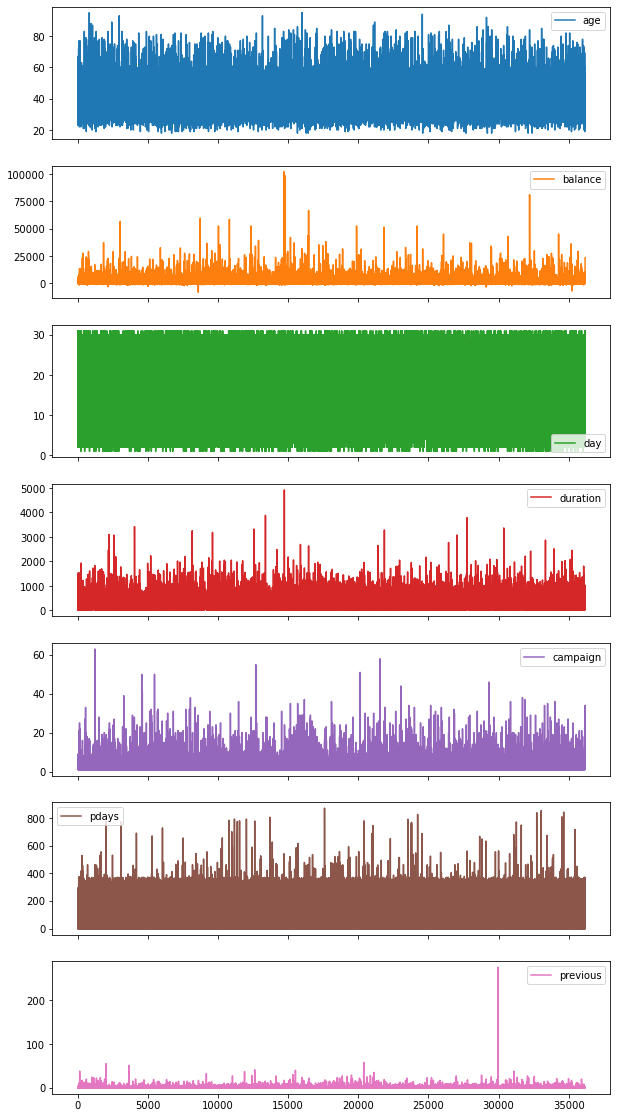

In [5]:
train_data.plot(subplots = True, figsize = (10,20))

In [6]:
for col in train_data.columns:
    if col == 'balance' or col == 'duration':
        continue
    print('For col:',col)
    print(set(train_data[col].values))

For col: age
{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 92, 93, 94, 95}
For col: job
{'management', 'student', 'self-employed', 'unknown', 'retired', 'entrepreneur', 'services', 'blue-collar', 'unemployed', 'technician', 'housemaid', 'admin.'}
For col: marital
{'divorced', 'single', 'married'}
For col: education
{'primary', 'secondary', 'tertiary', 'unknown'}
For col: default
{'no', 'yes'}
For col: housing
{'no', 'yes'}
For col: loan
{'no', 'yes'}
For col: contact
{'cellular', 'telephone', 'unknown'}
For col: day
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
For col: month
{'jul', 'mar', 'feb', 'dec', 'sep', 'aug', 'may', 'nov', 'jun', 'jan', 'oct', 'apr'}
For col: campaign
{

In [15]:
def make_one_hot_encoding(data, cols):
    Y = data['y']
    data.drop('y', axis = 'columns', inplace = True)
    for col in cols:
        append_data = pd.get_dummies(data[col])
        for new_col in append_data.columns:
            data[col +'.'+ str(new_col)] = append_data[new_col]
        data.drop(col, axis = 'columns', inplace = True)
    data['y'] = Y
    return data

In [27]:
##Read data and make one hot vectors
train_data = read_data(train_path)
n_categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'campaign', 'poutcome']
print('non categorical or biary cols',set(train_data.columns) - set(n_categorical_cols))
ohe_train_data = make_one_hot_encoding(train_data, n_categorical_cols)
ohe_train_data.head()

non categorical or biary cols {'loan', 'balance', 'y', 'age', 'pdays', 'day', 'housing', 'default', 'previous', 'duration'}


,age,default,balance,housing,loan,day,duration,pdays,previous,job.admin.,...,campaign.50,campaign.51,campaign.55,campaign.58,campaign.63,poutcome.failure,poutcome.other,poutcome.success,poutcome.unknown,y
0,57,no,890,no,no,5,343,-1,0,0,...,0,0,0,0,0,0,0,0,1,no
1,56,no,2558,no,no,19,288,-1,0,0,...,0,0,0,0,0,0,0,0,1,no
2,50,no,267,yes,no,21,30,-1,0,0,...,0,0,0,0,0,0,0,0,1,no
3,47,no,4567,no,no,31,921,-1,0,0,...,0,0,0,0,0,0,0,0,1,no
4,49,no,5887,no,no,2,181,293,2,0,...,0,0,0,0,0,1,0,0,0,yes


In [28]:
numerical_cols = ['age', 'balance', 'day', 'duration','pdays', 'previous']

In [29]:
def process_continuous_data(data, cols):
    for col in cols:
        print(data[col].head())
        med = np.median(data[col])
        data[col] = data[col] > med
        print('med',med)
        print(data[col].head())
    return data
process_continuous_data(ohe_train_data,numerical_cols)
ohe_train_data.head()

0    57
1    56
2    50
3    47
4    49
Name: age, dtype: int64
med 39.0
0    True
1    True
2    True
3    True
4    True
Name: age, dtype: bool
0     890
1    2558
2     267
3    4567
4    5887
Name: balance, dtype: int64
med 451.0
0     True
1     True
2    False
3     True
4     True
Name: balance, dtype: bool
0     5
1    19
2    21
3    31
4     2
Name: day, dtype: int64
med 16.0
0    False
1     True
2     True
3     True
4    False
Name: day, dtype: bool
0    343
1    288
2     30
3    921
4    181
Name: duration, dtype: int64
med 180.0
0     True
1     True
2    False
3     True
4     True
Name: duration, dtype: bool
0     -1
1     -1
2     -1
3     -1
4    293
Name: pdays, dtype: int64
med -1.0
0    False
1    False
2    False
3    False
4     True
Name: pdays, dtype: bool
0    0
1    0
2    0
3    0
4    2
Name: previous, dtype: int64
med 0.0
0    False
1    False
2    False
3    False
4     True
Name: previous, dtype: bool


,age,default,balance,housing,loan,day,duration,pdays,previous,job.admin.,...,campaign.50,campaign.51,campaign.55,campaign.58,campaign.63,poutcome.failure,poutcome.other,poutcome.success,poutcome.unknown,y
0,True,no,True,no,no,False,True,False,False,0,...,0,0,0,0,0,0,0,0,1,no
1,True,no,True,no,no,True,True,False,False,0,...,0,0,0,0,0,0,0,0,1,no
2,True,no,False,yes,no,True,False,False,False,0,...,0,0,0,0,0,0,0,0,1,no
3,True,no,True,no,no,True,True,False,False,0,...,0,0,0,0,0,0,0,0,1,no
4,True,no,True,no,no,False,True,True,True,0,...,0,0,0,0,0,1,0,0,0,yes


In [17]:
def entropy(data):
    m = data.shape[0]
    negative_data = data[data['y'] == 'no'].shape[0]
    positive_data = data[data['y'] == 'yes'].shape[0]
    if negative_data == 0 or positive_data == 0:
        return 0
    ent = (positive_data/m)*np.log2(m/positive_data) + (negative_data/m)*np.log2(m/negative_data)
    return ent
# entropy(ohe_train_data)

In [30]:
#Could calculate unique values before hand
def inf_gain(attr, data):
    m = data.shape[0]
    uniq_values = set(data[attr].values)
    Hs = []
    for val in uniq_values:
        sub_data = data[data[attr] == val]
        en = entropy(sub_data)
        prob = sub_data.shape[0]/m
        Hs.append(prob*en)
    return np.sum(Hs)

In [32]:
def best_attr_split(data):
    max_ig = 0
    best_attr = 0
    H_y = entropy(data)
    for col in data.columns[:-1]:
        #print('For col:',col)
        ig = H_y - inf_gain(col, data)
        #print('info gain:',ig)
        if max_ig < ig:
            max_ig = ig
            best_attr = col
    return best_attr, max_ig
best_attr_split(ohe_train_data)

('duration', 0.05762669921007035)

In [35]:
class Node:
    total_nodes = 0
    def  __init__(self, parent, val=-1, childs = []):
        self.parent = parent
        self.val = val
        self.childs = childs
        self.sub_tree_size = 0
        Node.total_nodes += 1


In [36]:
def build_tree(data, parent = None):
    if len(set(data['y'].values)) <=1:
        return Node(parent = parent, val = 0, childs = [])
    split_attr, max_ig = best_attr_split(data)
    
    if max_ig < 0:
        return None
    values_to_split = set(data[split_attr].values)
    node = Node(parent)
    for val in values_to_split:
        child = build_tree(data[data[split_attr] == val], node)
        child.val = val
        node.childs.append(child)
        node.sub_tree_size += child.sub_tree_size
    return node

In [46]:
## Trial of build tree
tree_root = build_tree(ohe_train_data[:100])

In [47]:
tree_root.childs

In [49]:
def print_tree(node):
    if node.parent == None:
        print('Root->',node.val)
    else:
        print('val:',node.val)
    if node.childs == []:
        return 0
    for child in node.childs:
        print_tree(child)
    return 0
print_tree(tree_root)

Root-> -1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False
val: True
val: 1
val: False
val: True
val: 0
val: False

RecursionError: maximum recursion depth exceeded while calling a Python object

[]